In [1]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')

# Preprocesado y modelado
# ==============================================================================
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from sklearn.preprocessing import scale
from sklearn.metrics import silhouette_score

import json

from sklearn.decomposition import PCA

inline_rc = dict(plt.rcParams)

In [2]:
"""
reviews = []
with open('data/yelp_academic_dataset_review.json') as fl:
    i=0
    for review in fl:
        reviews.append(json.loads(review))
        i+=1
        if i + 1 > 10000:
            break

df_review = pd.DataFrame(reviews)
print(df_review.head())
"""

df_review = pd.read_csv('data/yelp_reviews.csv')
print(df_review)

                 business_id        date               review_id  stars  \
0     9yKzy9PApeiPPOUJEtnvkg  2011-01-26  fWKvX83p0-ka4JS3dc6E5A      5   
1     ZRJwVLyzEJq1VAihDhYiow  2011-07-27  IjZ33sJrzXqU-0X6U8NwyA      5   
2     6oRAC4uyJCsJl1X0WZpVSA  2012-06-14  IESLBzqUCLdSzSqm0eCSxQ      4   
3     _1QQZuf4zZOyFCvXc0o6Vg  2010-05-27  G-WvGaISbqqaMHlNnByodA      5   
4     6ozycU1RpktNG2-1BroVtw  2012-01-05  1uJFq2r5QfJG_6ExMRCaGw      5   
...                      ...         ...                     ...    ...   
9995  VY_tvNUCCXGXQeSvJl757Q  2012-07-28  Ubyfp2RSDYW0g7Mbr8N3iA      3   
9996  EKzMHI1tip8rC1-ZAy64yg  2012-01-18  2XyIOQKbVFb6uXQdJ0RzlQ      4   
9997  53YGfwmbW73JhFiemNeyzQ  2010-11-16  jyznYkIbpqVmlsZxSDSypA      4   
9998  9SKdOoDHcFoxK5ZtsgHJoA  2012-12-02  5UKq9WQE1qQbJ0DJbc-B6Q      2   
9999  pF7uRzygyZsltbmVpjIyvw  2010-10-16  vWSmOhg2ID1MNZHaWapGbA      5   

                                                   text    type  \
0     My wife took me here on my

In [3]:
business = []
with open('data/yelp_academic_dataset_business.json') as fl:
    for i, line in enumerate(fl):
        business.append(json.loads(line))

df_business = pd.DataFrame(business)
print(df_business.head())



              business_id                      name  \
0  Pns2l4eNsfO8kk83dixA6A  Abby Rappoport, LAC, CMQ   
1  mpf3x-BjTdTEA3yCZrAYPw             The UPS Store   
2  tUFrWirKiKi_TAnsVWINQQ                    Target   
3  MTSW4McQd7CbVtyjqoe9mw        St Honore Pastries   
4  mWMc6_wTdE0EUBKIGXDVfA  Perkiomen Valley Brewery   

                           address           city state postal_code  \
0           1616 Chapala St, Ste 2  Santa Barbara    CA       93101   
1  87 Grasso Plaza Shopping Center         Affton    MO       63123   
2             5255 E Broadway Blvd         Tucson    AZ       85711   
3                      935 Race St   Philadelphia    PA       19107   
4                    101 Walnut St     Green Lane    PA       18054   

    latitude   longitude  stars  review_count  is_open  \
0  34.426679 -119.711197    5.0             7        0   
1  38.551126  -90.335695    3.0            15        1   
2  32.223236 -110.880452    3.5            22        0   
3  39.9555

In [4]:
useful_reviews = len(df_review[df_review["useful"]>0])
cool_reviews = len(df_review[df_review["cool"]>0])
funny_reviews = len(df_review[df_review["funny"]>0])
negative_reviws = len(df_review[df_review["stars"]<2])
positive_reviews =len(df_review[df_review["stars"]>3])
total_reviews = len(df_review)

print("Total reviews: {}".format(total_reviews))
print("Useful reviews: {}".format(useful_reviews))
print("Funny reviews: {}".format(funny_reviews))
print("Cool reviews: {}".format(cool_reviews))
print("Total negative reviews: {}".format(negative_reviws))
print("Total positive reviews: {}".format(positive_reviews))

Total reviews: 10000
Useful reviews: 5870
Funny reviews: 2987
Cool reviews: 3710
Total negative reviews: 749
Total positive reviews: 6863


In [5]:
df_review = df_review.drop(["review_id", "user_id", "useful", "funny", "cool", "date"], axis=1)
df_business = df_business.drop(["name", "address", "city", "state", "postal_code", "latitude", "longitude", "stars", "review_count", "is_open", "attributes", "hours"], axis=1)

In [6]:
print(df_review.head())
print(df_business.head())

              business_id  stars  \
0  9yKzy9PApeiPPOUJEtnvkg      5   
1  ZRJwVLyzEJq1VAihDhYiow      5   
2  6oRAC4uyJCsJl1X0WZpVSA      4   
3  _1QQZuf4zZOyFCvXc0o6Vg      5   
4  6ozycU1RpktNG2-1BroVtw      5   

                                                text    type  
0  My wife took me here on my birthday for breakf...  review  
1  I have no idea why some people give bad review...  review  
2  love the gyro plate. Rice is so good and I als...  review  
3  Rosie, Dakota, and I LOVE Chaparral Dog Park!!...  review  
4  General Manager Scott Petello is a good egg!!!...  review  
              business_id                                         categories
0  Pns2l4eNsfO8kk83dixA6A  Doctors, Traditional Chinese Medicine, Naturop...
1  mpf3x-BjTdTEA3yCZrAYPw  Shipping Centers, Local Services, Notaries, Ma...
2  tUFrWirKiKi_TAnsVWINQQ  Department Stores, Shopping, Fashion, Home & G...
3  MTSW4McQd7CbVtyjqoe9mw  Restaurants, Food, Bubble Tea, Coffee & Tea, B...
4  mWMc6_wTdE0EUBKIG

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

vectorizer = TfidfVectorizer()
lemma = WordNetLemmatizer()

X = []
for r in df_review["text"]: #Por cada review
    txt = word_tokenize(r.lower()) #Separa la review en palabras
    newtxt = ""
    for w in txt: #Por cada palabra en txt
        l = lemma.lemmatize(w) #se hace lo de quitar mayusculas y quitar raice y eso
        newtxt += l+" "
    X.append(newtxt)

X = vectorizer.fit_transform(X)
print(X)

  (0, 2156)	0.04703594851376377
  (0, 10246)	0.04327452122248712
  (0, 23711)	0.023776756023744076
  (0, 25263)	0.06454049218781506
  (0, 3805)	0.06344181793858494
  (0, 1501)	0.09052149332921015
  (0, 23714)	0.10158573976543536
  (0, 5303)	0.1071820685061679
  (0, 14601)	0.06383407086497428
  (0, 660)	0.08623862359610177
  (0, 3339)	0.07327447089112721
  (0, 10520)	0.16873231640394784
  (0, 16161)	0.026152530391724802
  (0, 17421)	0.08500054337747688
  (0, 25773)	0.06350633558146422
  (0, 3906)	0.06253199354190347
  (0, 6641)	0.06048033981008264
  (0, 23138)	0.06865377877028164
  (0, 21207)	0.13369031741934786
  (0, 24945)	0.09772265535208663
  (0, 7882)	0.08247719630482513
  (0, 20416)	0.13702424354276954
  (0, 24136)	0.12288057918146657
  (0, 25607)	0.08470315542960269
  (0, 13882)	0.06825014036074209
  :	:
  (9999, 12466)	0.11031267215545941
  (9999, 1167)	0.05667689340607519
  (9999, 10478)	0.053438104782009346
  (9999, 16905)	0.10651297039284208
  (9999, 20210)	0.0877309200969811

In [8]:
X= X.toarray()
X=pd.DataFrame(X)
print(X)

      0      1      2      3      4      5      6         7      8      9      \
0       0.0    0.0    0.0    0.0    0.0    0.0    0.0  0.000000    0.0    0.0   
1       0.0    0.0    0.0    0.0    0.0    0.0    0.0  0.111455    0.0    0.0   
2       0.0    0.0    0.0    0.0    0.0    0.0    0.0  0.000000    0.0    0.0   
3       0.0    0.0    0.0    0.0    0.0    0.0    0.0  0.000000    0.0    0.0   
4       0.0    0.0    0.0    0.0    0.0    0.0    0.0  0.000000    0.0    0.0   
...     ...    ...    ...    ...    ...    ...    ...       ...    ...    ...   
9995    0.0    0.0    0.0    0.0    0.0    0.0    0.0  0.000000    0.0    0.0   
9996    0.0    0.0    0.0    0.0    0.0    0.0    0.0  0.000000    0.0    0.0   
9997    0.0    0.0    0.0    0.0    0.0    0.0    0.0  0.000000    0.0    0.0   
9998    0.0    0.0    0.0    0.0    0.0    0.0    0.0  0.000000    0.0    0.0   
9999    0.0    0.0    0.0    0.0    0.0    0.0    0.0  0.000000    0.0    0.0   

      ...  26271  26272  26

In [9]:
X.describe()

,0,1,2,3,4,5,6,7,8,9,...,26271,26272,26273,26274,26275,26276,26277,26278,26279,26280
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.001998,0.000247,0.000015,0.000005,0.000071,0.000144,0.000072,0.000046,0.000012,0.000009,...,0.000011,0.000028,0.000012,0.000017,0.000012,0.000019,0.000015,0.000005,0.000014,0.000007
std,0.019138,0.005859,0.001497,0.000479,0.003077,0.005153,0.003291,0.002333,0.001187,0.000877,...,0.001063,0.002843,0.001156,0.001700,0.001194,0.001901,0.001521,0.000456,0.001438,0.000654
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.531065,0.258785,0.149661,0.047934,0.180552,0.262204,0.230600,0.145244,0.118691,0.087669,...,0.106341,0.284341,0.115558,0.169989,0.119378,0.190051,0.152131,0.045614,0.143837,0.065417


In [10]:
def plot_dendrogram(model, **kwargs):
    '''
    Esta función extrae la información de un modelo AgglomerativeClustering
    y representa su dendograma con la función dendogram de scipy.cluster.hierarchy
    '''

    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot
    dendrogram(linkage_matrix, **kwargs)

In [11]:
from sklearn.decomposition import PCA

#Antes de aplicar el método de clasificación utilizamos PCA para reducir el número de atributos
print('Dim originally: ',X.shape)
#Como vamos a representar gráficamente los clusters, nos quedaremos con los 2 atributos más imporantes
pca = PCA(n_components=2)
pca.fit(X)
# Cambio de base a dos dimensiones PCA
X = pca.transform(X)
print('Dim after PCA: ',X.shape)

Dim originally:  (10000, 26281)
Dim after PCA:  (10000, 2)


In [12]:


# Escalado de datos
# ==============================================================================
X_scaled = scale(X)



In [13]:
# Modelos
# ==============================================================================
"""
modelo_hclust_complete = AgglomerativeClustering(
                            affinity = 'euclidean',
                            linkage  = 'complete',
                            distance_threshold = 0,
                            n_clusters         = None
                        )
modelo_hclust_complete.fit(X=X_scaled)

modelo_hclust_average = AgglomerativeClustering(
                            affinity = 'euclidean',
                            linkage  = 'average',
                            distance_threshold = 0,
                            n_clusters         = None
                        )
modelo_hclust_average.fit(X=X_scaled)
"""
modelo_hclust_ward = AgglomerativeClustering(
                            affinity = 'euclidean',
                            linkage  = 'ward',
                            distance_threshold = 0,
                            n_clusters         = None
                     )
modelo_hclust_ward.fit(X=X_scaled)

AgglomerativeClustering(distance_threshold=0, n_clusters=None)

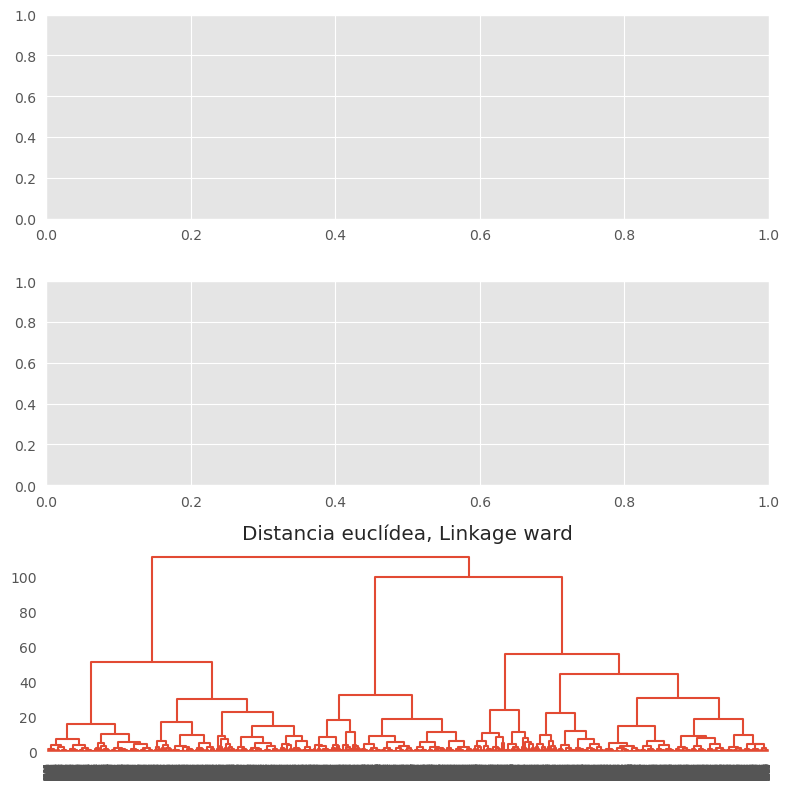

In [14]:
# Dendrogramas
# ==============================================================================
fig, axs = plt.subplots(3, 1, figsize=(8, 8))
#plot_dendrogram(modelo_hclust_average, color_threshold=0, ax=axs[0])
#axs[0].set_title("Distancia euclídea, Linkage average")
#plot_dendrogram(modelo_hclust_complete, color_threshold=0, ax=axs[1])
#axs[1].set_title("Distancia euclídea, Linkage complete")
plot_dendrogram(modelo_hclust_ward, color_threshold=0, ax=axs[2])
axs[2].set_title("Distancia euclídea, Linkage ward")
plt.tight_layout();

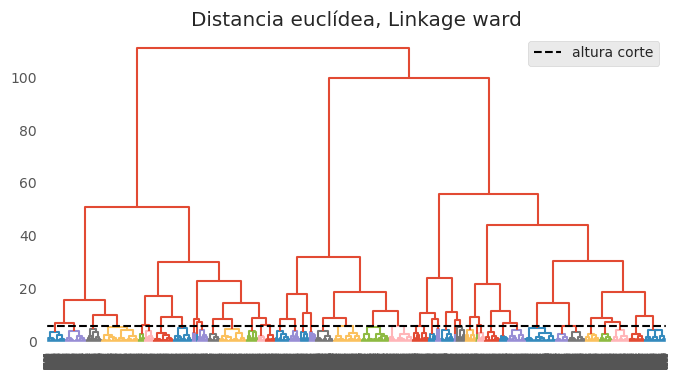

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
altura_corte = 6
plot_dendrogram(modelo_hclust_ward, color_threshold=altura_corte, ax=ax)
ax.set_title("Distancia euclídea, Linkage ward")
ax.axhline(y=altura_corte, c = 'black', linestyle='--', label='altura corte')
ax.legend();

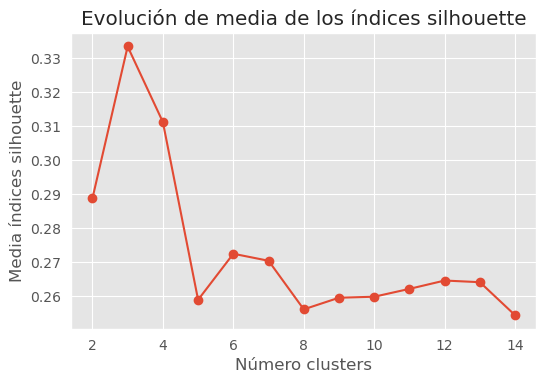

In [16]:
# Método silhouette para identificar el número óptimo de clusters
# ==============================================================================
range_n_clusters = range(2, 15)
valores_medios_silhouette = []

for n_clusters in range_n_clusters:
    modelo = AgglomerativeClustering(
                    affinity   = 'euclidean',
                    linkage    = 'ward',
                    n_clusters = n_clusters
             )

    cluster_labels = modelo.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    valores_medios_silhouette.append(silhouette_avg)

fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.plot(range_n_clusters, valores_medios_silhouette, marker='o')
ax.set_title("Evolución de media de los índices silhouette")
ax.set_xlabel('Número clusters')
ax.set_ylabel('Media índices silhouette');

In [17]:
# Modelo
# ==============================================================================
modelo_hclust_ward = AgglomerativeClustering(
                            affinity = 'euclidean',
                            linkage  = 'ward',
                            n_clusters = 4
                     )
modelo_hclust_ward.fit(X=X_scaled)

AgglomerativeClustering(n_clusters=4)